# Prüfungsleitung Maschnielles Lernen: Gruppe 8

bearbeitet von folgenden Matrikelnummern: 2150648, 8503403 <br>
Isolet download: https://datahub.io/machine-learning/isolet

In der vorliegenden Prüfungsleistung wurde die Aufgabe gestellt, Buchstaben anhand von Audioaufnahmen zu erkennen. Als Datenset diente eine bereits vorgefertigte Matrix mit 7797 Samples, welches 617 Merkmalen aus den Audioaufnahmen extrahiert hat. Die 617 Merkmale sind Gleitkommazahlen im Wertebereich von -1 bis 1. Das Notebook beinhaltet beide gestellten Aufgaben, sowie den Code und die dazugehörige Dokumentation in Markdown-Boxen. In der ersten Aufgabe handelt es sich um die Erstellung eines Modells mittels überwachter Lernverfahren. Bei der zweiten Aufgabe mittels einem Deep Learning-Modell. <br>
Die zu verwendeten Bibliotheken sind folgende:
* vorgegebene Bibliotheken: tensorflow, sklearn und numpy
* weitere Bibliotheken: pandas, seaborn und matplotlib

Der Code wurde mit Python v3.10.8 getestet

### Aufgabe 2

Lösung durch Deep Learning.

#### 1.1) Import und Splitting des Datensatzes

##### Import(s)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import argmax
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dense
from tensorflow.keras.metrics import SparseCategoricalAccuracy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
import seaborn as sns

Das zu importierende Datenset soll den Namen "raw_isolet.csv" tragen und im gleichen Pfad, wie das Notebook sein. Zum Zeitpunkt des Herunterladen der Isolet-Datei war die Abgrenzung der Werte durch das Komma-Symbol erfolgt. Sollte sich das geändert haben, muss der Parameter delimeter angepasst werden.

In [2]:
# import
df_raw_isolet = pd.read_csv("./raw_isolet.csv", delimiter=",")

##### Datenbereinigung

Dadurch dass 'class' ein reserviertes Keyword in Python kollidiert es mit der Funktionsmöglichkeit die Spalte über eigene Funktionsaufrufe aufzurufen. Es wurde diesbezüglich zur Spalte 'Letter' umbenannt. Außerdem wurden die String-typischen Anführungszeichen entfernt. <br>
Zuletzt wird das Datenset in die Merkmale "df_features" und die Buchstaben "df_letters" gesplittet.

In [3]:
# changing column name 'class' to 'letter' 'cause class is a reserved keyword in python 
df_raw_isolet.rename(columns={'class': 'letter'}, inplace=True)
# removing char ' from letter
df_raw_isolet['letter'] = df_raw_isolet['letter'].replace({'\'': ''}, regex=True).astype(float) - 1

df_features = df_raw_isolet.iloc[:, :617].to_numpy()
df_letters = df_raw_isolet.iloc[:, 617].to_numpy()

Zur besseren Einteilung wurde ein Wörterbuch erstellt, welches die Zahlen in die gewünschten Buchstaben umwandelt.

In [4]:
dict = {
    1: 'a',
    2: 'b',
    3: 'c',
    4: 'd',
    5: 'e',
    6: 'f',
    7: 'g',
    8: 'h',
    9: 'i',
    10: 'j',
    11: 'k',
    12: 'l',
    13: 'm',
    14: 'n',
    15: 'o',
    16: 'p',
    17: 'q',
    18: 'r',
    19: 's',
    20: 't',
    21: 'u',
    22: 'v',
    23: 'w',
    24: 'x',
    25: 'y',
    26: 'z',
}

##### Data Splitting

Der Datensatz wird nun mit dem gewünschten Verhältnis (test_size) eingeteilt. Damit die Anzahl an Klassen (Buchstaben) gleichmäßig verteilt ist, werden die Datensätze nicht vermischt (shuffle=False). 

In [5]:
features_train, features_test, letters_train, letters_test = train_test_split(df_features, df_letters, test_size=.25, shuffle=False)

#### 2.2) Netzwerkarchitektur

Die Herausforderung bei der Wahl der Netzwerkarchitektur ist es die richtige verschiedenen Eigenschaften für das Modell zu finden, wie bspw. die Anzahl der Schichten, Neuronen, Aktivierungsfunktion, etc. <br>
Bei der Auswahl der Schichten gilt es darauf zu achten, dass nicht zu wenige implementiert werden, um wichtige Erkenntnisse auch weiterzugeben, sowie nicht zu viele um die Performance gering zu halten und die Gefahr des Overfitting zu vermeiden. In unseren Fall hat das Datenset keine hohe Komplexität und verschiedenste Anzahl an Merkmale, die es zu auszuwerten gilt. Das DL-Modell braucht daher keine aufwendige Netzwerkarchitektur. <br>
Da anhand von Float-Werten Klassifiziert werden soll, ist das Feedforward-Neural-Network die beste und einfachste Vorgehensweise. Das die Trainingszeit dieses Modells schnell ist, wie bei manch anderen Aufgaben, konnte man auch das Prinzip des Trial and Error ausnutzen. Man ist Anfangs mit 4 Schichten gestartet (500, 250, 125, 26). Im weiteren Verlauf hat man Schubweise die Anzahl an Schichten und Neuronen gesteigert. Das für uns beste Ergebnis in Sachen Genauigkeit und Dauer hatte die Konstellation (100, 600, 400, 200, 100, 26) ergeben. Man hat sich bei den Schichten zu einem vollvernetzen Deep-Learning-Modell entschieden, da es sich hierbei um ein überwachtes Lernverfahren handelt. Es ist auch gut für den Einsatz, wenn viele Eigenschaften eines Merkmals ausgewertet werden sollen. Es sollte sich bewusst gemacht werden, dass vollvernetzen Deep-Learning-Modelle die Gefahr haben zum Overfitten. <br><br>

Bei der Aktivierungsfunktion wurde sich aufgrund der Beliebtheit für die ReLU entschieden. Man hat sicherheitshalber dies auch die (Leaky ReLU)-Funktion getestet. Es haben sich keine messbaren Änderungen herausgestellt und es wurde das ReLU aufgrund der Beliebtheit in der Community vorgezogen. Für die Initialisierung der Neuronen wurde die speziell konzipierte HeNormal-Funktion verwendet. <br>
Damit am Ende eine Klassifikation von 26 entsteht soll, wurde bei der letzten Schicht die Aktivierungsfunktion Softmax verwendet.



#### 2.3) Implementierung

In [6]:
# Dimensionen der Trainingsdaten bestimmen
in_shape = df_features.shape[1:]

model = Sequential()
model.add(Dense(1000, activation='relu', kernel_initializer='he_normal', input_shape=in_shape))
model.add(Dense(600, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(400, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(200, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(100, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(26, activation='softmax'))

#### 2.4) Wahl der Loss-Funktion und Optimizer

Bei der Wahl der Loss-Funktion bietet Keras zwei für die Klassifikation zwei verschiedene Funktionen an: 'sparse_categorical_crossentropy' und 'categorial_crossentropy'. Da die Labels als Integer definiert sind, wird die Sprase-Funktion verwendet. Für die Wahl des Optimizers haben wir uns auf den beliebtesten Optizimer gemäß der Vorlesung bezogen (Folie 25 Kapitel 7). Dadurch, dass die Lernrate adaptiv angepasst wird, braucht es keine aufwendigen manuellen Einstellungen vorzunehmen. Die Nachteile sind die langsame Konvergenz bei großen Datensätzen und der hohe Speicherbedarf. Dies hat aber für die Größe und Komplexität des Datensatz keine allzu große Auswirkungen. 

In [7]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=[SparseCategoricalAccuracy()])

Für das Training wurde eine Batch-Size von 512 ausgewählt. Im Gegensatz zu den häufigen Internetquellen, die eine Batch-Size von 32 oder 64 vorschlagen, konnte man aber eine sehr hohe Instabilität der Werte für Genauigkeit und Loss erkennen. Mit dem Wert 265 war die Instabilität zufallsabhängig ab und zu immer noch vorhanden, der Wert 512 war in den Testdurchläufen deutlich besser. Eine höhere Anzahl die Speicheranforderung erhöht in der Regel die Speicheranforderung konnte aber aufgrund der Komplexität des Datensatzes sogar auf einen Business-Laptop unter 20 Sekunden trainiert werden. <br>
Bei der Epochenanzahl ist man anfangs mit 50 Epochen gestartet. Durch das folgende Diagramm kam man zum Entschluss dass die Asymptoten schon bei 15 erkennbar ist. Sicherheitshalber, und weil das Training an sich schon kurz ist, wurde ein etwas größerer Wert 30 genommen. 

In [8]:
history = model.fit(features_train, letters_train, epochs=30, batch_size=512, verbose=True, validation_data=(features_test, letters_test))

Epoch 1/30
12/12 [==============================] - 1s 36ms/step - loss: 1.8047 - sparse_categorical_accuracy: 0.4885 - val_loss: 0.7837 - val_sparse_categorical_accuracy: 0.7103
Epoch 2/30
12/12 [==============================] - 0s 25ms/step - loss: 0.4971 - sparse_categorical_accuracy: 0.8225 - val_loss: 0.3134 - val_sparse_categorical_accuracy: 0.8913
Epoch 3/30
12/12 [==============================] - 0s 26ms/step - loss: 0.2455 - sparse_categorical_accuracy: 0.9201 - val_loss: 0.2678 - val_sparse_categorical_accuracy: 0.9133
Epoch 4/30
12/12 [==============================] - 0s 26ms/step - loss: 0.1640 - sparse_categorical_accuracy: 0.9502 - val_loss: 0.2158 - val_sparse_categorical_accuracy: 0.9318
Epoch 5/30
12/12 [==============================] - 0s 25ms/step - loss: 0.1081 - sparse_categorical_accuracy: 0.9684 - val_loss: 0.2114 - val_sparse_categorical_accuracy: 0.9318
Epoch 6/30
12/12 [==============================] - 0s 25ms/step - loss: 0.1071 - sparse_categorical_accu

#### 2.5) Evaluierung

##### Trainingshistorie

Damit die Interpretation der ausschlaggebenden Variablen besser interpretierbar ist, wurde ein Lineplot erstellt. Anhand dessen konnte man gut das Training nachvollziehen und Performance einstellungen anpassen und evaluieren. 

In [9]:
def create_training_graph(history):
    df_history = pd.DataFrame(history.history).reset_index()
    df_history.columns = ["Epoch", "loss", "accuracy", "val_loss", "val_accuracy"]
    df_history = pd.melt(df_history, id_vars="Epoch", value_vars=["loss", "accuracy", "val_loss", "val_accuracy"])
    fig = sns.lineplot(df_history, x="Epoch", y="value", hue="variable")
    fig.set_title("Training history")
    return fig

Evaluation der Implementierung in der 2.4)

Accuracy: 0.9574359059333801, Loss: 0.16818676888942719


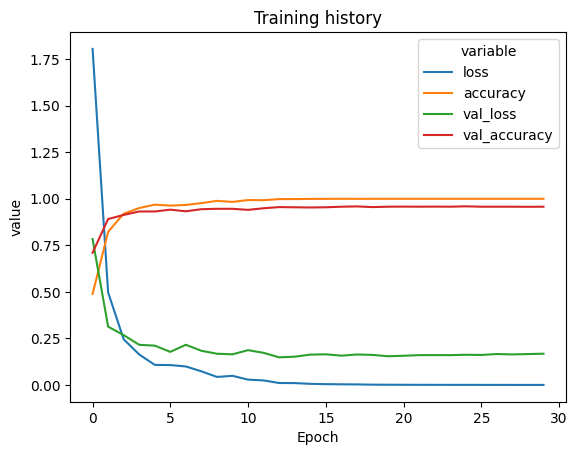

In [10]:
fig = create_training_graph(history)
loss, acc = model.evaluate(features_test, letters_test, verbose=0)
print(f"Accuracy: {acc}, Loss: {loss}")

##### 3-fold cv

Der Ansatz der dreifach gefaltete Kreuzvalidierung wurde bereits in der Aufgabe 1 erläutert.

------------------------------------------------------------------------
Training for fold 1 ...


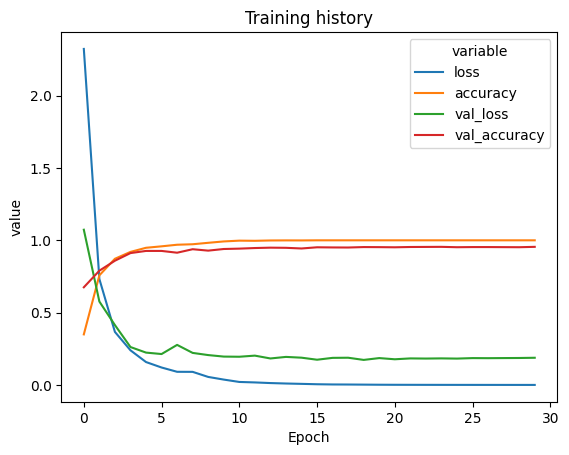

Score for fold 1: loss of 0.24891644716262817; accuracy of 94.15084719657898%
------------------------------------------------------------------------
Training for fold 2 ...


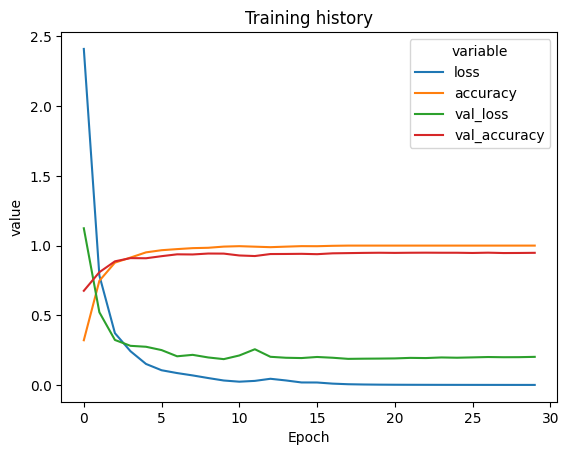

Score for fold 2: loss of 0.19328776001930237; accuracy of 95.02308964729309%
------------------------------------------------------------------------
Training for fold 3 ...


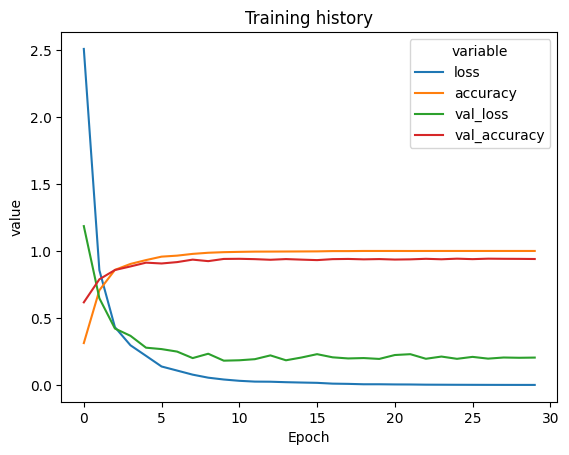

Score for fold 3: loss of 0.19106122851371765; accuracy of 95.48486471176147%
------------------------------------------------------------------------


In [11]:
# Dimensionen der Trainingsdaten bestimmen
in_shape = df_features.shape[1:]

kfold = KFold(n_splits=3)
acc_per_fold = []
loss_per_fold = []

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(features_train, letters_train):

    model = Sequential()
    model.add(Dense(1000, activation='relu', kernel_initializer='he_normal', input_shape=in_shape))
    model.add(Dense(600, activation='relu', kernel_initializer='he_normal'))
    model.add(Dense(400, activation='relu', kernel_initializer='he_normal'))
    model.add(Dense(200, activation='relu', kernel_initializer='he_normal'))
    model.add(Dense(100, activation='relu', kernel_initializer='he_normal'))
    model.add(Dense(26, activation='softmax'))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=[SparseCategoricalAccuracy()])

    # Generate a print 
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    #history = model.fit(features_train[train], letters_train[train], epochs=30, batch_size=512, verbose=False) why no validation data???
    history = model.fit(features_train[train], letters_train[train], epochs=30, batch_size=512, verbose=False, validation_data=(features_test, letters_test))

    # show plot
    create_training_graph(history)
    plt.show()
    
    # Generate generalization metrics
    loss, acc = model.evaluate(features_train[test], letters_train[test], verbose=False)
    print(f'Score for fold {fold_no}: loss of {loss}; accuracy of {acc*100}%')
    acc_per_fold.append(acc * 100)
    loss_per_fold.append(loss)

    # Increase fold number
    fold_no = fold_no + 1
    
print('------------------------------------------------------------------------')

In [12]:
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {loss_per_fold[i]} - Accuracy: {acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_per_fold)} (+- {np.std(acc_per_fold)})')
print(f'> Loss: {np.mean(loss_per_fold)}')
print('------------------------------------------------------------------------')

------------------------------------------------------------------------
Score per fold
------------------------------------------------------------------------
> Fold 1 - Loss: 0.24891644716262817 - Accuracy: 94.15084719657898%
------------------------------------------------------------------------
> Fold 2 - Loss: 0.19328776001930237 - Accuracy: 95.02308964729309%
------------------------------------------------------------------------
> Fold 3 - Loss: 0.19106122851371765 - Accuracy: 95.48486471176147%
------------------------------------------------------------------------
Average scores for all folds:
> Accuracy: 94.88626718521118 (+- 0.5531370971112776)
> Loss: 0.21108847856521606
------------------------------------------------------------------------


Mit einer Genauigkeit von ca. 95% ist das Modell sehr gut gelungen. Es hat eine bessere Genauigkeit als, die der Aufgabe 1. 

# Weitere Bestandteiles des Kurzreports

### Arbeitsverteilung

Für die Arbeitsverteilung wurden die Aufgabe in zwei Hälften gegliedert und diese jeweils verteilt erarbeitet. Bei der Aufgabe 1 war das erste Arbeitspaket die Erstellung des Imports, die Datenbereinigung, Data Splitting, Merkmalsreduktion und das Erstellen des Random Forest Classifier. Das zweite Aufgabenpaket enthielt die Erstellung des k-Means Cluster, das Erstellen der Diagramme und der Evaluation. <br>
Bei der Aufgabe 2 hatte das erste Arbeitspaket die Erstellung des Imports, Datenbereinigung, Konzipierung der Architektur, sowie deren Implementierung. Der zweite Aufgabenbereich kümmerte sich um Wahl des Optimizer und Loss-Funktion, deren Evaluierung und Anpassung sowie das Erstellen der weiteren Kurzreport-Artikel. Sobald eine Aufgabe beendet wurde, hatte man sich zu einem Review getroffen, wo Verbesserungsvorschläge ausgetauscht und Fehler korrigiert wurden.

### Diskussion beider Implementierungsvorgänge

Zusammenfassend hat sich herausgestellt, dass die Implementierung eines Deep Learning-Modell deutlich leichter von statten ging, als die merkmalsbasierte ML-Implementierung. Dies hat damit zu tun, dass bei der Implementierung der Aufgabe 1 deutlich mehr Verständnis für das Datenset und die Algorithmen benötigt wurde, als beim DL. In unserer Aufgabe nicht gefordertert aber erwähnenswert, ist die Tatsache, dass die Merkmalsextraktion bei komplizierten Aufgaben sehr zeitaufwendig sein kann und auch öfters mehrere Anstöße braucht, um die richtige Lösung zu finden. Und dennoch musste der Datensatz mehrere male manuell angepasst werden, damit die zur Verfügung gestellten Funktionen von sklearn dies auch richtig verarbeiten können. <br> 
Bei der Aufgabe 2 wurde mehr nach dem Trial and Error-Prinzip vorgegangen. Die Recherche und der Implementierungsaufwand waren hierfür wesentlich kürzer. Eine wichtige Erkenntnis, die bei der Aufgabenbearbeitung festgestellt wurde, war der Einsatz von Diagrammen. Für uns hat die graphische Darstellung eine bessere Interpretations- und Vergleichsmöglichkeit der Algorithmen-Parameter geben und haben dadurch bessere Anpassungen vornehmen können. <br> 
Ein Vorteil der merkmalsbasierten ML-Implementierung ist die Verständlichkeit, wie das Modell auf die Entscheidung kommt. So ist man beispielsweise durch das gute Verständnis des k-Mean Klassifikators schnell zur Erkenntnis gekommen, warum die Genauigkeit so gering ist und wieso es für die Aufgabe ungeeignet ist. Beim Deep Learning kennt man den Algorithmus, kann aber (zumindestens wir als Laien) nur sehr schlecht einschätzen wie viele Layer es braucht, wie viele Neuronen geplant werden sollen und ob überhaupt ein Erfolg durch die Vorgehensweise festgestellt werden kann. <br>
Eine weitere Beobachtung war aber, dass bei dem Training des DL-Modell bereits die doppelte Rechenzeit festgestellt werden konnte. Beim PCA hatte die Trainingszeit ca 3-5 Sekunden gedauert. Beim unüberwachten Lernverfahren k-Means 0,3-0,8 Sekunden. Das DL-Modell brauchte ca. 9-11 Sekunden. Sollte eine viel größere Aufgabe und/oder ein größerer Datensatz verwendet werden, kann das Problem verstärkt werden und ein einfaches Ausprobieren der Parameter mittels Trial and Error nicht mehr so einfach zu bewerkstelligen sein.
